## Simpson's paradox

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

### Model Definition

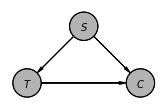

In [2]:
simp_model = BayesianModel([('S', 'T'), ('T', 'C'), ('S', 'C')])
simp_model.to_daft(node_pos={'T': (0, 0), 'C': (2, 0), 'S': (1, 1)}).render()

In [3]:
cpd_s = TabularCPD(variable='S',
                   variable_card=2,
                   values=[[0.5],
                           [0.5]],
                   state_names={'S': ['m', 'f']})
cpd_t = TabularCPD(variable='T',
                   variable_card=2,
                   values=[[0.25, 0.75],
                           [0.75, 0.25]],
                   evidence=['S'],
                   evidence_card=[2],
                   state_names={'S':['m', 'f'], 'T':[0, 1]})
cpd_c = TabularCPD(variable='C',
                   variable_card=2,
                   values=[[0.3, 0.4, 0.7, 0.8],
                           [0.7, 0.6, 0.3, 0.2]],
                   evidence=['S', 'T'],
                   evidence_card=[2, 2],
                   state_names={'S': ['m', 'f'], 'T': [0, 1], 'C': [0, 1]})

simp_model.add_cpds(cpd_s, cpd_t, cpd_c)

### Inference conditioning on T

In [4]:
# Non adjusted inference
infer_non_adjust = VariableElimination(simp_model)
print(infer_non_adjust.query(variables=['C'], evidence={'T': 1}))
print(infer_non_adjust.query(variables=['C'], evidence={'T': 0}))

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 104.39it/s]

Finding Elimination Order: :   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 266.20it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+


### Inference with do-operation on T

In [5]:
infer_adjusted = CausalInference(simp_model)
print(infer_adjusted.query(variables=['C'], do={'T': 1}))
print(infer_adjusted.query(variables=['C'], do={'T': 0}))

  0%|          | 0/2 [00:00<?, ?it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+


## Specifying adjustment sets

100%|██████████| 2/2 [00:00<00:00, 14.16it/s]


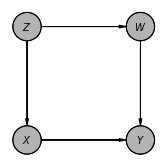

In [6]:
model = BayesianModel([('X', 'Y'), ('Z', 'X'), ('Z', 'W'), ('W', 'Y')])
cpd_z = TabularCPD(variable='Z',
                   variable_card=2,
                   values=[[0.2],
                           [0.8]])

cpd_x = TabularCPD(variable='X',
                   variable_card=2,
                   values=[[0.1, 0.3],
                           [0.9, 0.7]],
                   evidence=['Z'],
                   evidence_card=[2])

cpd_w = TabularCPD(variable='W',
                   variable_card=2,
                   values=[[0.2, 0.9],
                           [0.8, 0.1]],
                   evidence=['Z'],
                   evidence_card=[2])

cpd_y = TabularCPD(variable='Y',
                   variable_card=2,
                   values=[[0.3, 0.4, 0.7, 0.8],
                           [0.7, 0.6, 0.3, 0.2]],
                   evidence=['X', 'W'],
                   evidence_card=[2, 2])

model.add_cpds(cpd_z, cpd_x, cpd_w, cpd_y)

model.to_daft(node_pos={'X': (0, 0), 'Y': (2, 0), 'Z': (0, 2), 'W': (2, 2)}).render()

In [7]:
# Do operation with a specified adjustment set.
infer = CausalInference(model)
do_X_W = infer.query(['Y'], do={'X': 1}, adjustment_set=['W'])
print(do_X_W)

do_X_Z = infer.query(['Y'], do={'X': 1}, adjustment_set=['Z'])
print(do_X_Z)

do_X_WZ = infer.query(['Y'], do={'X': 1}, adjustment_set=['W', 'Z'])
print(do_X_WZ)

infer_simp = CausalInference(simp_model)
do_simpson = infer_simp.query(['C'], do={'T': 1}, adjustment_set=['S'])
print(do_simpson)

  0%|          | 0/2 [00:00<?, ?it/s]/home/ankur/pgmpy/examples/pgmpy/factors/discrete/DiscreteFactor.py:189: UserWarning: Using W state as number instead of name.
  warn(f"Using {var} state as number instead of name.")

  0%|          | 0/2 [00:00<?, ?it/s]/home/ankur/pgmpy/examples/pgmpy/factors/discrete/DiscreteFactor.py:189: UserWarning: Using Z state as number instead of name.
  warn(f"Using {var} state as number instead of name.")


  0%|          | 0/2 [00:00<?, ?it/s]

+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.7240 |
+------+----------+
| Y(1) |   0.2760 |
+------+----------+
+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.7240 |
+------+----------+
| Y(1) |   0.2760 |
+------+----------+
+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.7240 |
+------+----------+
| Y(1) |   0.2760 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+


In [9]:
# Adjustment without do operation.
infer = CausalInference(model)
adj_W = infer.query(['Y'], adjustment_set=['W'])
print(adj_W)

adj_Z = infer.query(['Y'], adjustment_set=['Z'])
print(adj_Z)

adj_WZ = infer.query(['Y'], adjustment_set=['W', 'Z'])
print(adj_WZ)

infer_simp = CausalInference(simp_model)
adj_simpson = infer_simp.query(['C'], adjustment_set=['S'])
print(adj_simpson)

+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.6200 |
+------+----------+
| Y(1) |   0.3800 |
+------+----------+
+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.6200 |
+------+----------+
| Y(1) |   0.3800 |
+------+----------+
+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.6200 |
+------+----------+
| Y(1) |   0.3800 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5500 |
+------+----------+
| C(1) |   0.4500 |
+------+----------+
